In [ ]:
# First notebook
## Basic visualization walkthrough 

# Second Notebook

## Already made notebook to show potential of advanced visualizations

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd


In [29]:
import csv
with open('owid-covid-latest.csv', newline='') as csvfile:
    # spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    spamreader = csv.reader(csvfile, delimiter=',')
    
    data = list(spamreader)
    
    # for row in spamreader:
    #     print(', '.join(row))
    #     print()

In [30]:

df = pd.read_csv('owid-covid-latest.csv')


In [31]:
df.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [32]:
# dir(df)

In [44]:
countries = df['location'][:10]
total_cases = df['total_cases'][:10]

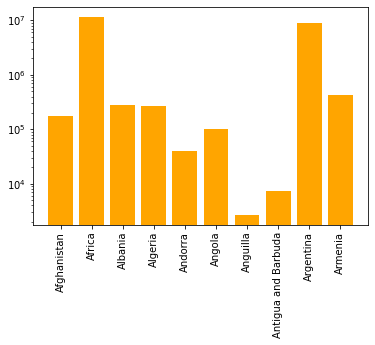

In [54]:
x = np.arange(len(total_cases))
plt.bar(x=x, height=total_cases, color='orange')
plt.xticks(ticks=x, labels=list(countries))
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()